<heading>
Evaluation of the PMDK libvmmalloc on striped Intel Optane DC Persistent Memory
</heading>

The purpose of this work is to compare the performance of persistent memory in the memory allocation library at various sizes which correspond to the underlying stripe size of the persistent memory.

The data was collected on the Intel AEP system and tests workloads between 1 and 23 cores (node 1).

Note that the graphs the tool generated are not well-labeled as I hacked the script to get the data quickly.

**jemalloc** is actually the PMDK data.


In [62]:
#!/usr/bin/python3
#
# This is for processing the data
#
import os
import subprocess
import csv
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pandas as pd
import numpy as np
import json
import matplotlib2tikz

In [63]:
dirs = [d for d in os.listdir('.') if 'size' in d]
print(dirs)

['size-1024', 'size-1280', 'size-1536', 'size-1792', 'size-2048', 'size-2304', 'size-256', 'size-2560', 'size-2816', 'size-3072', 'size-3328', 'size-3584', 'size-3840', 'size-4096', 'size-512', 'size-768']


In [64]:
sizes = [int(s[5:]) for s in dirs]
sizes.sort()
print(sizes)


[256, 512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096]


In [65]:
size_data = {}
for size in sizes:
    with open('size-{}/cached/bench_alloc_free_alloc_1_23_{}_{}_false'.format(size,size,size)) as fd:
        size_data[size] = json.load(fd)
        assert len(size_data[size]) is 23
cpu_counts = [x+1 for x in range(0,23)]
print(cpu_counts)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


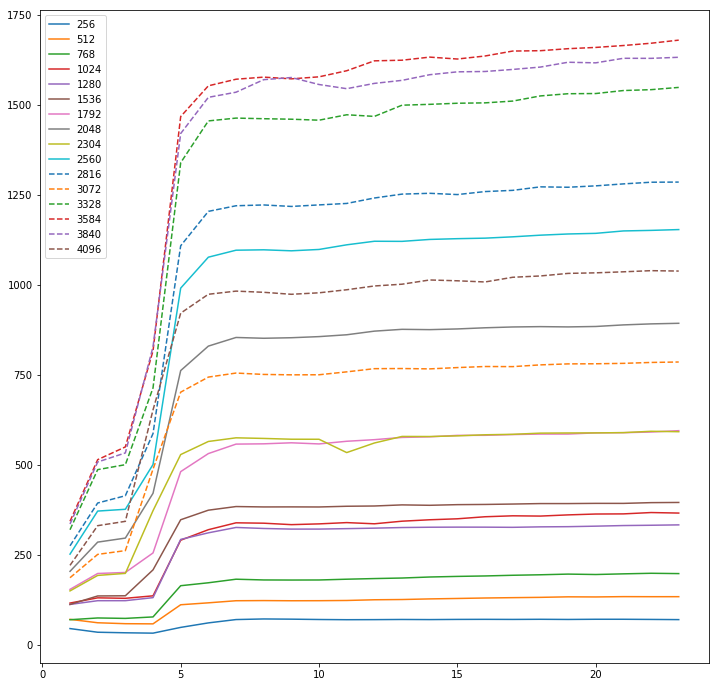

In [105]:
fig = plt.figure(figsize=[12,12])
fmt='-'
for index in range(0,len(sizes)):
    ydata = []
    if index is 10: fmt='--'
    for idx2 in range(0,len(cpu_counts)):
        ydata.append(size_data[sizes[index]][idx2] / cpu_counts[idx2])
    plt.plot(cpu_counts,ydata, label='{}'.format(sizes[index]),linestyle=fmt)
plt.legend()
plt.show()

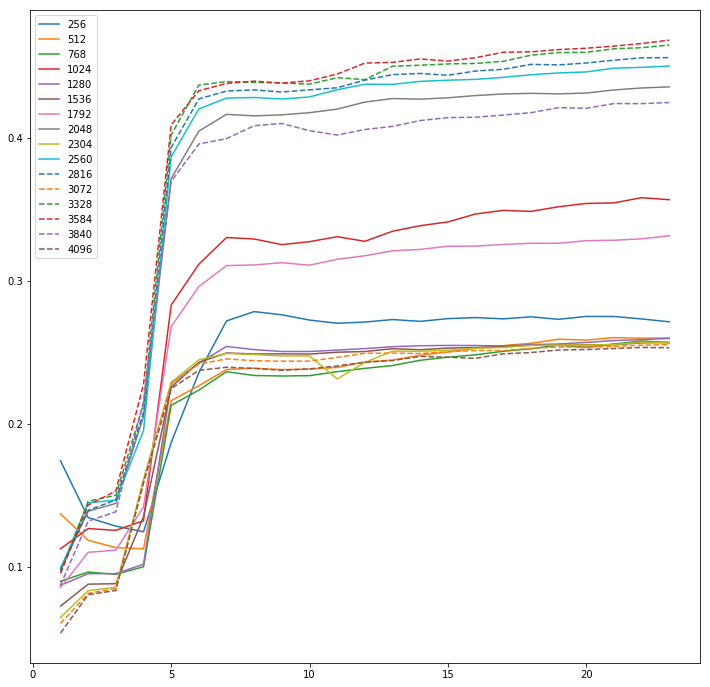

In [108]:
fig = plt.figure(figsize=[12,12])
fmt='-'
for index in range(0,len(sizes)):
    ydata = []
    if index is 10: fmt='--'
    for idx2 in range(0,len(cpu_counts)):
        ydata.append(size_data[sizes[index]][idx2] / (sizes[index] * cpu_counts[idx2]))
    plt.plot(cpu_counts,ydata, label='{}'.format(sizes[index]),linestyle=fmt)
plt.legend()
plt.show()

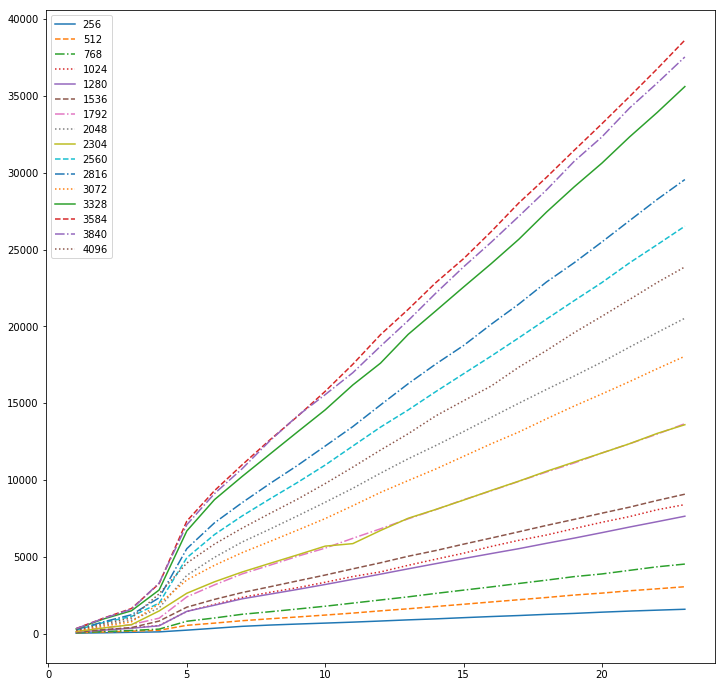

In [124]:
fig = plt.figure(figsize=[12,12])
colors=['b','g','r','c','m','y','k']
linestyles=['-','--','-.',':']
fmt = ['{}'.format(ls) for c in colors for ls in linestyles]
for index in range(0,len(sizes)):
    ydata = []
    for idx2 in range(0,len(cpu_counts)):
        ydata.append(size_data[sizes[index]][idx2])
    plt.plot(cpu_counts,ydata, label='{}'.format(sizes[index]),linestyle=fmt[index])
plt.legend()
plt.show()

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


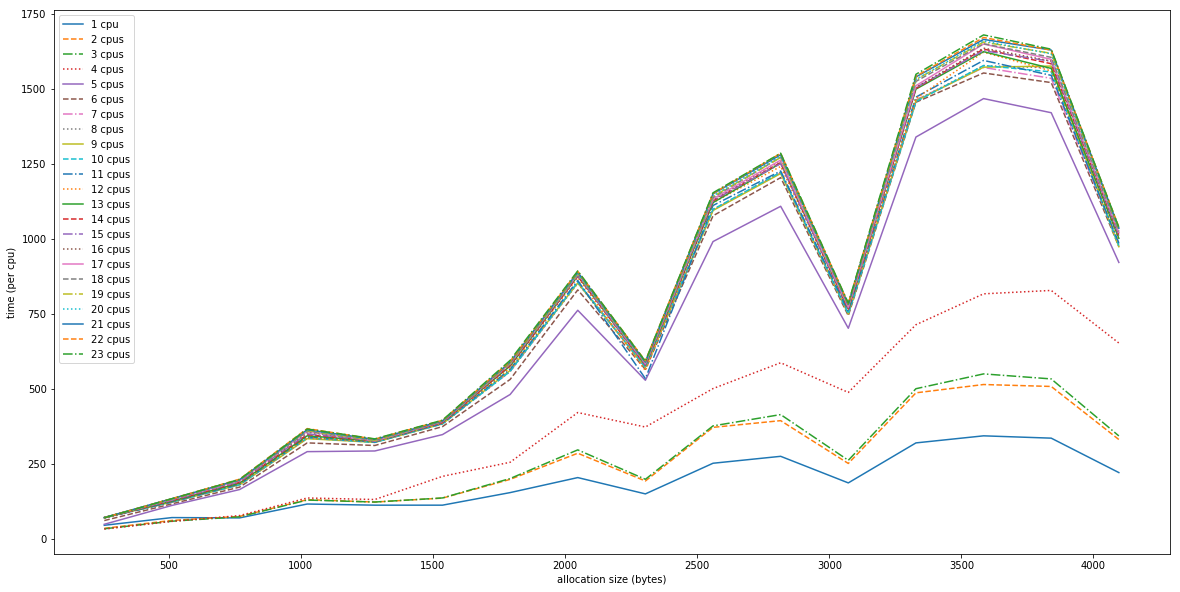

In [142]:
fig = plt.figure(figsize=[20,10])
colors=['b','g','r','c','m','y','k']
linestyles=['-','--','-.',':']
fmt = ['{}'.format(ls) for c in colors for ls in linestyles]
for cc in cpu_counts:
    ydata = [(size_data[sizes[index]][cc-1] / (cc)) for index in range(0, len(sizes))]
    label='{} cpus'.format(cc)
    if cc is 1: label='1 cpu'
    plt.plot(sizes, ydata, label=label, linestyle=fmt[(cc-1) % len(fmt)])
plt.legend()
plt.xlabel('allocation size (bytes)')
plt.ylabel('time (per cpu)')
fig_base_name='pmdk-alloc-fig'
matplotlib2tikz.save("{}.tex".format(fig_base_name))
plt.savefig('{}.png'.format(fig_base_name))
plt.savefig('{}.pdf'.format(fig_base_name))
plt.show()
